# Data Loading

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
import pandas as pd
import numpy as np
import re

In [ ]:
train_file = "/content/gdrive/MyDrive/DL/Train_data.txt"
test_file = "/content/gdrive/MyDrive/DL/Test_data.txt"

In [ ]:
def read_data(file):
    data = []
    with open(file, 'r', encoding='utf-8') as file:
        for line in file:
            data.append(line.strip())
    return data

In [ ]:
train_data_preprocess = read_data(train_file)
test_data_preprocess = read_data(test_file)

In [ ]:
df_train = pd.DataFrame(train_data_preprocess, columns=['text'])
df_test = pd.DataFrame(test_data_preprocess, columns=['text'])

df_train['label'] = df_train['text'].apply(lambda x: x.split(' ')[0].replace('__label__', ''))
df_train['text'] = df_train['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))

df_test['label'] = df_test['text'].apply(lambda x: x.split(' ')[0].replace('__label__', ''))
df_test['text'] = df_test['text'].apply(lambda x: ' '.join(x.split(' ')[1:]))

df_train

,text,label
0,"Theo hành trình tour du lịch Mỹ - Bờ Đông, du ...",Du_lich
1,mình cần tìm 1 phòng cho khoảng 3 người quanh...,Nha_dat
2,Cho thuê nhà riêng dt 60m/sàn. Có 4 phòng ngủ...,Nha_dat
3,"Cho thuê nhà ở tầng 4 khép kín, 4/295 Nguyễn K...",Nha_dat
4,► Crumpler jackpack full photo ► giá : 800.000...,Mua_sam
...,...,...
15995,CÁC MÓN KIM CHI NGON CHO MÙA THU -------------...,Do_an_va_do_uong
15996,Cần cho thuê Chung cư Greenstar 234 Phạm Văn Đ...,Nha_dat
15997,CHƯƠNG TRÌNH HỌC PHÍ THÁNG 08/2016 TẶNG NGAY ...,Kinh_doanh_va_Cong_nghiep
15998,Bố trí thông minh giúp nhà ống Sài Gòn không c...,Nha_va_vuon


In [ ]:
df_test

,text,label
0,Gấp ; Hiện bên em đang cần thuê 1 phòng có Diệ...,﻿Nha_dat
1,🌈 CHÀO NOEL ĐÓN MƯA QUÀ TẶNG . 😍 Nhân dịp Noel...,Mang_internet_va_vien_thong
2,📢📢📢 KHỞI CÔNG XÂY DỰNG 33 CĂN NHÀ PHỐ LIỀN KỀ ...,Kinh_doanh_va_Cong_nghiep
3,"Sáng ngày hôm nay, BTC rất vui khi nhận được s...",Sach
4,Cần cho thuê căn hộ chung cư dưới sài đồng đối...,Nha_dat
...,...,...
10012,[ TỔNG HỢP NHỮNG MÓN NGON KHU VỰC ĐÀO TẤN - BA...,Do_an_va_do_uong
10013,Bản tin tài chính kinh doanh tối thứ sáu (23/0...,Tai_chinh
10014,"Ngang nhiên vừa hack vừa stream, game thủ Over...",Giai_tri
10015,"5 TOUR NƯỚC NGOÀI DỊP GIÁNG SINH, NĂM MỚI GIÁ ...",Du_lich


# Data Preprocessing

In [ ]:
def preprocess_text(text):
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'[^\w\s]|_', '', text)
    text = re.sub(r'\d+', '', text)
    text = text.strip()
    text = re.sub(r'\s+', ' ', text)
    text = text.lower()

    return text

In [ ]:
test = preprocess_text('Đau mỏi vai gáy nên đi massage cổ, nhưng sau đó nữ ca sĩ đã không thể di chuyển vì gặp nhiều triệu chứng đau nhức, không thể nằm thẳng lưng được. Sau gần 1 tháng điều trị, cô đã không thể qua khỏi. Theo: Vietnamnet')
test

'đau mỏi vai gáy nên đi massage cổ nhưng sau đó nữ ca sĩ đã không thể di chuyển vì gặp nhiều triệu chứng đau nhức không thể nằm thẳng lưng được sau gần tháng điều trị cô đã không thể qua khỏi theo vietnamnet'

In [ ]:
def preprocess_data(df):
    df['text'] = df['text'].apply(lambda x: preprocess_text(x))
    df.drop_duplicates(subset=['text'], inplace=True)
    return df

In [ ]:
df_train = preprocess_data(df_train)
df_test = preprocess_data(df_test)

In [ ]:
print(df_train['text'][:5])
print(df_test['text'][:5])

0    theo hành trình tour du lịch mỹ bờ đông du khá...
1    mình cần tìm phòng cho khoảng người quanh khu ...
2    cho thuê nhà riêng dt msàn có phòng ngủ p khác...
3    cho thuê nhà ở tầng khép kín nguyễn khoái có b...
4    crumpler jackpack full photo giá vnđ giảm còn ...
Name: text, dtype: object
0    gấp hiện bên em đang cần thuê phòng có diện tí...
1    chào noel đón mưa quà tặng nhân dịp noel viett...
2    khởi công xây dựng căn nhà phố liền kề chỉ tri...
3    sáng ngày hôm nay btc rất vui khi nhận được sá...
4    cần cho thuê căn hộ chung cư dưới sài đồng đối...
Name: text, dtype: object


In [ ]:
print(df_train.dtypes)
print(df_test.dtypes)

text     object
label    object
dtype: object
text     object
label    object
dtype: object


In [ ]:
label_to_encoded = {label: idx for idx, label in enumerate(df_train['label'].unique())}

df_train['label'] = df_train['label'].map(label_to_encoded)
df_test['label'] = df_test['label'].map(label_to_encoded)

In [ ]:
label_to_encoded

{'Du_lich': 0,
 'Nha_dat': 1,
 'Mua_sam': 2,
 'Tai_chinh': 3,
 'Mang_internet_va_vien_thong': 4,
 'Nha_va_vuon': 5,
 'Kinh_doanh_va_Cong_nghiep': 6,
 'Nghe_thuat': 7,
 'Giao_duc': 8,
 'Lam_dep_va_the_hinh': 9,
 'Con_nguoi_va_xa_hoi': 10,
 'Sach': 11,
 'Chinh_tri': 12,
 'Do_an_va_do_uong': 13,
 'Giao_thong': 14,
 'Thoi_quen_va_so_thich': 15,
 'Giai_tri': 16,
 'Suc_khoe_va_benh_tat': 17,
 'Phap_luat': 18,
 'Khoa_hoc': 19,
 'May_tinh_va_thiet_bi_dien_tu': 20,
 'Cong_nghe_moi': 21,
 'The_thao': 22}

In [ ]:
print(df_train[:5])
print(df_test[:5])

                                                text  label
0  theo hành trình tour du lịch mỹ bờ đông du khá...      0
1  mình cần tìm phòng cho khoảng người quanh khu ...      1
2  cho thuê nhà riêng dt msàn có phòng ngủ p khác...      1
3  cho thuê nhà ở tầng khép kín nguyễn khoái có b...      1
4  crumpler jackpack full photo giá vnđ giảm còn ...      2
                                                text  label
0  gấp hiện bên em đang cần thuê phòng có diện tí...    NaN
1  chào noel đón mưa quà tặng nhân dịp noel viett...    4.0
2  khởi công xây dựng căn nhà phố liền kề chỉ tri...    6.0
3  sáng ngày hôm nay btc rất vui khi nhận được sá...   11.0
4  cần cho thuê căn hộ chung cư dưới sài đồng đối...    1.0


In [ ]:
print("Số lượng NaN trong df_train:")
print(df_train.isnull().sum())
print("\nSố lượng NaN trong df_test:")
print(df_test.isnull().sum())

Số lượng NaN trong df_train:
text     0
label    0
dtype: int64

Số lượng NaN trong df_test:
text     0
label    1
dtype: int64


In [ ]:
df_test = df_test.iloc[1:].reset_index(drop=True)

In [ ]:
print(df_test.head())

                                                text  label
0  chào noel đón mưa quà tặng nhân dịp noel viett...    4.0
1  khởi công xây dựng căn nhà phố liền kề chỉ tri...    6.0
2  sáng ngày hôm nay btc rất vui khi nhận được sá...   11.0
3  cần cho thuê căn hộ chung cư dưới sài đồng đối...    1.0
4  bài dự thi của ban nhạc old mac donal band ban...    7.0


In [ ]:
df_test['label'] = df_test['label'].astype(int)

In [ ]:
print(df_test.head())

                                                text  label
0  chào noel đón mưa quà tặng nhân dịp noel viett...      4
1  khởi công xây dựng căn nhà phố liền kề chỉ tri...      6
2  sáng ngày hôm nay btc rất vui khi nhận được sá...     11
3  cần cho thuê căn hộ chung cư dưới sài đồng đối...      1
4  bài dự thi của ban nhạc old mac donal band ban...      7


In [ ]:
print(df_train.dtypes)
print(df_test.dtypes)

text     object
label     int64
dtype: object
text     object
label     int64
dtype: object


# Load pre-trained PhoW2V and Vocabulary setup

In [ ]:
from gensim.models import KeyedVectors

word2vec_file = "/content/gdrive/MyDrive/DL/word2vec_vi_words_300dims.txt"
embed_lookup = KeyedVectors.load_word2vec_format(word2vec_file, binary=False)

In [ ]:
pretrained_words = embed_lookup.index_to_key
pretrained_words = pretrained_words[2:]
print(pretrained_words[:10])
print("Size of Vocab: {}\n".format(len(pretrained_words)))
print("Embedding dim: {}\n".format(len(embed_lookup[pretrained_words[0]])))

['và', 'của', 'là', 'các', 'có', 'được', 'trong', 'cho', 'đã', 'với']
Size of Vocab: 1587505

Embedding dim: 300



In [ ]:
row_idx = 0
word = pretrained_words[row_idx]
embedding = embed_lookup[word]

print('Word in vocab: {}\n'.format(word))
print('Length of embedding: {}\n'.format(len(embedding)))

Word in vocab: và

Length of embedding: 300



In [ ]:
find_similar_to = 'bóng_đá'
print('Similar words to ' + find_similar_to + ': \n')

for similar_word in embed_lookup.similar_by_word(find_similar_to):
    print("Word: {0}, Similarity: {1:.3f}".format(similar_word[0], similar_word[1]))

Similar words to bóng_đá: 

Word: Bóng_đá, Similarity: 0.747
Word: cầu_thủ, Similarity: 0.679
Word: cá_độ, Similarity: 0.654
Word: cá_cược, Similarity: 0.625
Word: đội_tuyển, Similarity: 0.608
Word: đấu, Similarity: 0.606
Word: thi_đấu, Similarity: 0.606
Word: World_Cup, Similarity: 0.606
Word: Oballa, Similarity: 0.605
Word: sân_cỏ, Similarity: 0.599


#Tokenization and padding

In [ ]:
from collections import Counter

def static_data(df):
    check_data = df['text'].tolist()

    texts_len = [len(text.split()) for text in check_data]

    zero_length_texts = sum(1 for length in texts_len if length == 0)

    min_text_length = min(texts_len)
    max_text_length = max(texts_len)
    average_text_length = np.mean(texts_len)
    median_text_length = np.median(texts_len)

    count = Counter([word for text in check_data for word in text.split()])

    print(f"Zero-length texts: {zero_length_texts}")
    print(f"Minimum text length: {min_text_length}")
    print(f"Maximum text length: {max_text_length}")
    print(f"Average text length: {average_text_length:.2f}")
    print(f"Median text length: {median_text_length}")

In [ ]:
static_data(df_train)
print("\n")
static_data(df_test)

Zero-length texts: 0
Minimum text length: 5
Maximum text length: 7349
Average text length: 262.33
Median text length: 147.0


Zero-length texts: 0
Minimum text length: 8
Maximum text length: 6940
Average text length: 270.00
Median text length: 150.0


In [ ]:
def plot_text_lengths(df, xlim=(0, 1000), bins=50):

    texts_len = [len(text.split()) for text in df['text'].tolist()]

    sns.set(style="whitegrid")

    plt.figure(figsize=(12, 6))
    sns.histplot(texts_len, bins=bins, kde=True, color='blue', edgecolor='black', alpha=0.7)

    plt.xlim(xlim)

    plt.title("Text Length Distribution", fontsize=16)
    plt.xlabel("Text Length (Number of Words)", fontsize=14)
    plt.ylabel("Frequency", fontsize=14)

    plt.show()

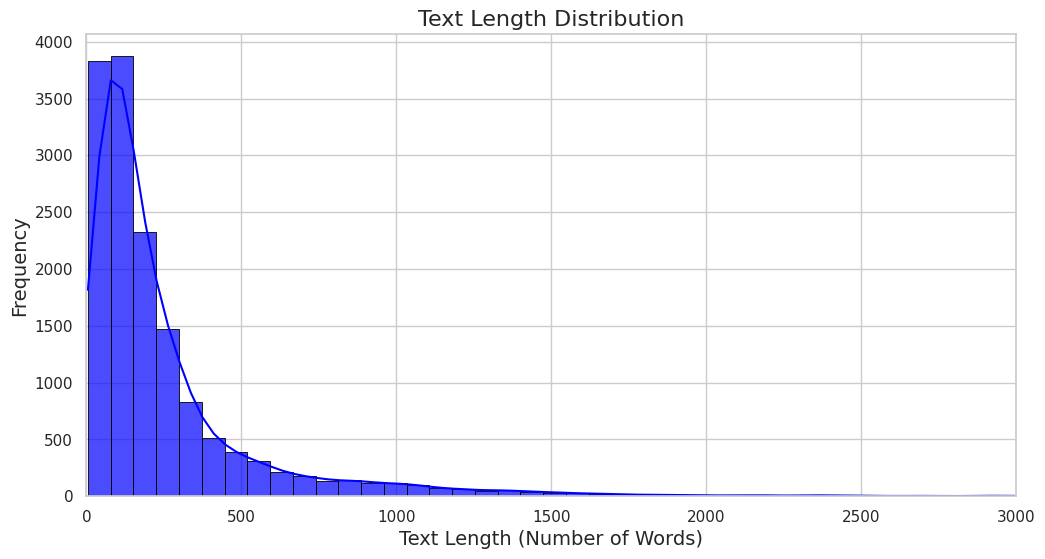

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plot_text_lengths(df_train, xlim=(0, 3000), bins=100)

In [ ]:
import nltk

nltk.download('punkt')
nltk.download('punkt_tab')

def tokenize(embed_lookup, texts):

    tokenized_texts = []

    for text in texts:
        tokens = nltk.word_tokenize(text)

        text_indices = []
        for word in tokens:
            try:
                word_idx = embed_lookup.key_to_index[word]
            except KeyError:
                word_idx = 0
            text_indices.append(word_idx)

        tokenized_texts.append(text_indices)

    return tokenized_texts

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


In [ ]:
texts_train = df_train['text'].tolist()
tokenized_text_train = tokenize(embed_lookup, texts_train)
texts_test = df_test['text'].tolist()
tokenized_text_test = tokenize(embed_lookup, texts_test)

In [ ]:
print(tokenized_text_train[0])
print(tokenized_text_test[0])

[59, 2582, 1769, 2897, 6794, 2386, 8046, 903, 556, 6794, 336, 3, 36990, 2582, 0, 34, 26, 23484, 264859, 2950, 2028, 7, 323, 217, 3, 115, 109, 14, 26552, 5104, 6794, 336, 117, 2419, 2785, 398, 2433, 372, 88, 3440, 3032, 30, 3526, 0, 2531, 2439, 0, 3146, 1995, 1822, 154, 98, 62, 563, 684, 11, 824, 77915, 313, 0, 2013, 4366, 748946, 3414, 496, 30, 72730, 93870, 6794, 336, 34, 41, 9481, 29221, 218, 5, 702, 1769, 560, 18927, 185, 94, 35, 464, 1000320, 2419, 2785, 0, 2785, 2403, 13406, 748946, 9, 26, 65, 761, 200, 702, 1769, 128, 4, 12, 3154, 14420, 5754, 10311, 7, 4802, 812, 2692, 0, 118, 9, 748946, 78678, 35, 693, 10, 7, 698, 150, 4, 12, 8, 17, 297, 824, 254, 62, 2199, 8886, 3867, 395, 560, 5651, 6983, 44, 22, 53, 6794, 2386, 8046, 26, 4728, 560, 297, 824, 138, 29, 4728, 650, 784, 4127, 138, 6794, 336, 28, 6, 4099, 1243, 11308, 2874, 899, 184, 5977, 4728, 1738]
[3325, 44811, 1077, 674, 1049, 795, 1420, 849, 44811, 162583, 9878, 1250, 5262, 1769, 22725, 13078, 11, 32, 11340, 9191, 6303, 370

In [ ]:
def pad_features(tokenized_texts, seq_length):

    features = np.ones((len(tokenized_texts), seq_length), dtype=int)

    for i, row in enumerate(tokenized_texts):
        features[i, -len(row):] = np.array(row)[:seq_length]

    return features

In [ ]:
seq_length = 300

train_features = pad_features(tokenized_text_train, seq_length=seq_length)

assert len(train_features)==len(tokenized_text_train)
assert len(train_features[0])==seq_length

test_features = pad_features(tokenized_text_test, seq_length=seq_length)

assert len(test_features)==len(tokenized_text_test)
assert len(test_features[0])==seq_length

print(train_features[4])
print("\n")
print(test_features[:20,:10])

[     1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      1      1      1      1      1      1      1      1      1
      1      0      0  17663  16602    129  61198    193     46  61198
   364

#Spliting Data

In [ ]:
split_frac = 0.8

encoded_labels = np.array(df_train['label'])


split_idx = int(len(train_features)*split_frac)
train_x, val_x = train_features[:split_idx], train_features[split_idx:]
train_y, val_y = encoded_labels[:split_idx], encoded_labels[split_idx:]
test_x = test_features
test_y = np.array(df_test['label'])


print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape),
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

			Feature Shapes:
Train set: 		(12047, 300) 
Validation set: 	(3012, 300) 
Test set: 		(9642, 300)


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

batch_size = 128

train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

trainloader = DataLoader(train_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
valloader = DataLoader(valid_data, batch_size=batch_size, shuffle=True, num_workers=2, pin_memory=True)
testloader = DataLoader(test_data, batch_size=batch_size, shuffle=False, num_workers=2, pin_memory=True)

# Training and Evaluating Model

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [ ]:
import torch.nn as nn
import torch.nn.functional as F

class BiLSTMwithCNN(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_classes, embed_model, freeze_embeddings=True):
        super(BiLSTMwithCNN, self).__init__()

        # Embedding layer
        self.embedding = nn.Embedding(vocab_size, embedding_dim, padding_idx=1)
        if embed_model is not None:
            self.embedding.weight = nn.Parameter(torch.from_numpy(embed_model.vectors))
            if freeze_embeddings:
                self.embedding.weight.requires_grad = False

        # Conv1D + BiLSTM layers
        self.conv1 = nn.Conv1d(in_channels=embedding_dim, out_channels=512, kernel_size=3, padding=1)
        #self.pool = nn.MaxPool1d(kernel_size=2, stride=2)
        self.lstm1 = nn.LSTM(input_size=512, hidden_size=128, num_layers=1, bidirectional=True, batch_first=True)

        self.conv2 = nn.Conv1d(in_channels=256, out_channels=512, kernel_size=3, padding=1)
        self.lstm2 = nn.LSTM(input_size=512, hidden_size=128, num_layers=1, bidirectional=True, batch_first=True)

        # Dropout
        self.dropout = nn.Dropout(0.6)

        # Fully connected layers
        self.fc1 = nn.Linear(256, 512)
        self.fc2 = nn.Linear(512, 128)
        self.fc3 = nn.Linear(128, num_classes)  # Output layer

        # Activation function
        self.relu = nn.ReLU()

    def forward(self, x):
        # Embedding layer
        x = self.embedding(x)  # (batch_size, seq_length, embedding_dim)
        x = x.permute(0, 2, 1)  # (batch_size, embedding_dim, seq_length)

        # First Conv1D and BiLSTM
        x = F.relu(self.conv1(x))  # (batch_size, 256, seq_length)
        #x = self.pool(x)
        x = x.permute(0, 2, 1)  # (batch_size, seq_length, 256)
        x, _ = self.lstm1(x)  # (batch_size, seq_length, 256)

        # Second Conv1D and BiLSTM
        x = x.permute(0, 2, 1)  # (batch_size, 256, seq_length)
        x = F.relu(self.conv2(x))  # (batch_size, 512, seq_length)
        #x = self.pool(x)
        x = x.permute(0, 2, 1)  # (batch_size, seq_length, 512)
        x, _ = self.lstm2(x)  # (batch_size, seq_length, 256)

        # GlobalAveragePooling
        x = torch.mean(x, dim=1)  # GlobalAveragePooling
        #avg_pool = torch.mean(x, dim=1) # GlobalAveragePooling
        #max_pool = torch.max(x, dim=1).values  # GlobalMaxPooling
        #x = torch.cat((avg_pool, max_pool), dim=1)  # Concatenate avg_pool and max_pool

        # Fully connected layers
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.fc3(x)

        return x

In [ ]:
# Early Stopping
class EarlyStopping:
    def __init__(self, patience=7, delta=0):
        self.patience = patience
        self.counter = 0
        self.min_validation_loss = float('inf')
        self.delta = delta

    def early_stop(self, validation_loss):
        if validation_loss < self.min_validation_loss:
            self.min_validation_loss = validation_loss
            self.counter = 0
        elif validation_loss > (self.min_validation_loss + self.delta):
            self.counter += 1
            if self.counter >= self.patience:
                return True
        return False

In [ ]:
from sklearn.metrics import f1_score

def calculate_f1_score(y_true, y_pred, num_labels):

    y_true = y_true.cpu().numpy()
    y_pred = y_pred.cpu().numpy()

    f1 = f1_score(y_true, y_pred, average='macro', labels=list(range(num_labels)))
    return f1

In [ ]:
def train(model, train_loader, val_loader, criterion, optimizer, epochs, patience=10, delta=0.01, save_path=""):
    # Initialize EarlyStopping
    early_stopper = EarlyStopping(patience=patience, delta=delta)

    model.train()
    train_losses = []
    val_losses = []
    train_accuracies = []
    val_accuracies = []

    best_val_loss = float('inf')
    best_model_state = None

    for epoch in range(epochs):
        train_loss = 0
        train_correct = 0
        train_total = 0

        # Training phase
        for inputs, labels in train_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            train_loss += loss.item()
            _, predicted = torch.max(outputs, dim=1)
            train_total += labels.size(0)
            train_correct += (predicted == labels).sum().item()

        epoch_loss = train_loss / len(train_loader)
        epoch_acc = 100. * train_correct / train_total
        train_losses.append(epoch_loss)
        train_accuracies.append(epoch_acc)

        # Validation phase
        model.eval()
        val_loss = 0
        val_correct = 0
        val_total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, dim=1)
                val_total += labels.size(0)
                val_correct += (predicted == labels).sum().item()

        val_loss /= len(val_loader)
        val_acc = 100. * val_correct / val_total
        val_losses.append(val_loss)
        val_accuracies.append(val_acc)

        print(f"Epoch {epoch+1}/{epochs} - Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.2f}%, "
              f"Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%")

        # Update best model state if validation loss improves
        if val_loss < best_val_loss:
            best_val_loss = val_loss
            best_model_state = model.state_dict()

        # Check Early Stopping condition
        if early_stopper.early_stop(val_loss):
            print(f"Early stopping triggered at epoch {epoch+1}")
            break

        model.train()

    # Save the best model state to the specified path after training ends
    if best_model_state is not None:
        print(f"Saving the best model with validation loss: {best_val_loss:.4f}")
        torch.save(best_model_state, save_path)

    return train_losses, train_accuracies, val_losses, val_accuracies

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Evaluating function
def evaluate(model, testloader, criterion):
    model.eval()
    correct = 0
    total = 0
    test_loss = 0

    all_labels = []
    all_predictions = []

    with torch.no_grad():
        for inputs, labels in testloader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)  # (batch_size, num_classes)
            loss = criterion(outputs, labels)
            test_loss += loss.item()

            # Get predicted class
            _, predicted = torch.max(outputs, dim=1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Collect predictions and labels for metrics
            all_labels.extend(labels.cpu().numpy())
            all_predictions.extend(predicted.cpu().numpy())

    # Calculate loss and accuracy
    avg_loss = test_loss / len(testloader)
    accuracy = 100. * correct / total

    # Calculate precision, recall, and F1 score
    precision = precision_score(all_labels, all_predictions, average='macro', zero_division=0)
    recall = recall_score(all_labels, all_predictions, average='macro', zero_division=0)
    f1 = f1_score(all_labels, all_predictions, average='macro', zero_division=0)


    return avg_loss, accuracy, precision, recall, f1, all_labels, all_predictions

In [55]:
# Hyperparameters
epochs = 35
learning_rate = 0.001

# Model parameters
embedding_dim = len(embed_lookup[pretrained_words[0]])
vocab_size = len(pretrained_words)
num_classes = 23

# Device configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Initialize model
model = BiLSTMwithCNN(vocab_size, embedding_dim, num_classes, embed_lookup)
model.to(device)

# Loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

print("Training the model:")
train_losses, train_accuracies, val_losses, val_accuracies = train(
    model, trainloader, valloader, criterion, optimizer, epochs, save_path="/content/gdrive/MyDrive/DL/BiLSTMwithCNN.pth"
)

print("\nEvaluating the model:")
best_model = BiLSTMwithCNN(vocab_size, embedding_dim, num_classes, embed_lookup)
best_model.to(device)
best_model.load_state_dict(torch.load("/content/gdrive/MyDrive/DL/BiLSTMwithCNN.pth", weights_only=True))
test_loss, test_accuracy, test_precision, test_recall, test_f1, _, _ = evaluate(best_model, testloader, criterion)

print(f"Test Results - Loss: {test_loss:.4f}, Accuracy: {test_accuracy:.2f}%, "
      f"Precision: {test_precision:.2f}, Recall: {test_recall:.2f}, F1 Score: {test_f1:.2f}")

Training the model:
Epoch 1/35 - Train Loss: 2.7109, Train Acc: 16.08%, Val Loss: 2.4832, Val Acc: 29.08%
Epoch 2/35 - Train Loss: 2.3503, Train Acc: 30.56%, Val Loss: 2.4489, Val Acc: 31.11%
Epoch 3/35 - Train Loss: 2.0193, Train Acc: 39.11%, Val Loss: 1.8190, Val Acc: 45.09%
Epoch 4/35 - Train Loss: 1.5648, Train Acc: 50.34%, Val Loss: 1.3723, Val Acc: 57.01%
Epoch 5/35 - Train Loss: 1.2670, Train Acc: 58.05%, Val Loss: 1.1536, Val Acc: 64.77%
Epoch 6/35 - Train Loss: 1.0552, Train Acc: 65.25%, Val Loss: 1.0229, Val Acc: 69.69%
Epoch 7/35 - Train Loss: 0.9156, Train Acc: 69.29%, Val Loss: 0.8363, Val Acc: 74.24%
Epoch 8/35 - Train Loss: 0.7592, Train Acc: 74.39%, Val Loss: 0.7506, Val Acc: 77.03%
Epoch 9/35 - Train Loss: 0.6549, Train Acc: 77.26%, Val Loss: 0.6260, Val Acc: 81.04%
Epoch 10/35 - Train Loss: 0.6059, Train Acc: 78.53%, Val Loss: 0.6393, Val Acc: 80.48%
Epoch 11/35 - Train Loss: 0.5421, Train Acc: 80.92%, Val Loss: 0.5126, Val Acc: 84.93%
Epoch 12/35 - Train Loss: 0.4768

#Visualization Process

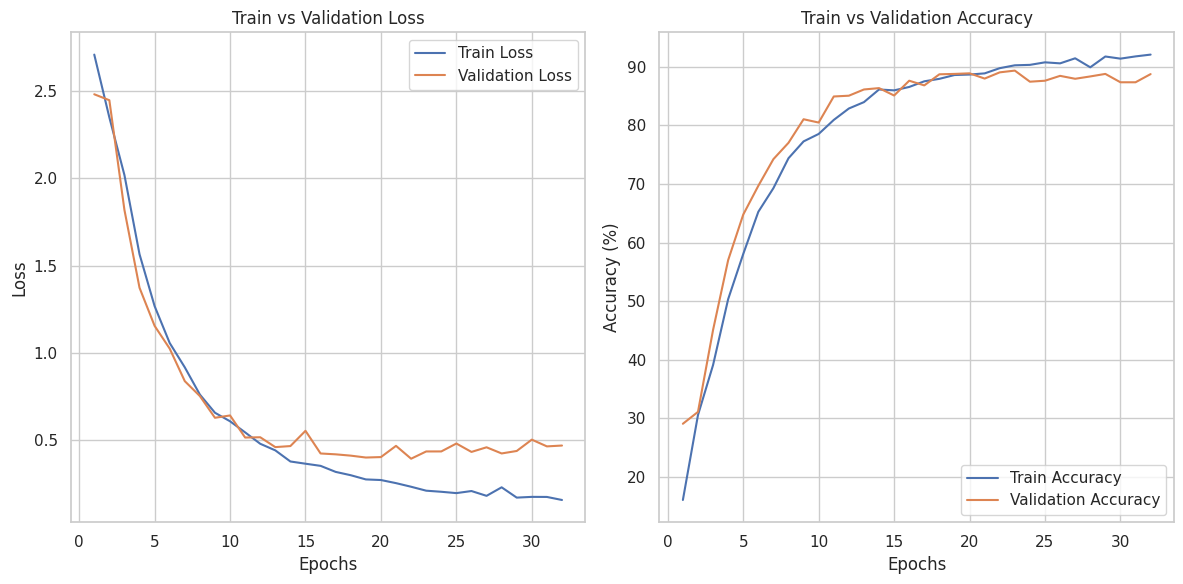

In [56]:
import matplotlib.pyplot as plt

# Function to plot train and validation metrics
def plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies):
    epochs = range(1, len(train_losses) + 1)

    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses, label='Train Loss')
    plt.plot(epochs, val_losses, label='Validation Loss')
    plt.title('Train vs Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Train Accuracy')
    plt.plot(epochs, val_accuracies, label='Validation Accuracy')
    plt.title('Train vs Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy (%)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

plot_metrics(train_losses, val_losses, train_accuracies, val_accuracies)

In [57]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns

def plot_confusion_matrix(true_labels, predicted_labels, label_names, label2id):
    cm = confusion_matrix(true_labels, predicted_labels, labels=label2id)
    plt.figure(figsize=(10, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_names, yticklabels=label_names)
    plt.title("Confusion Matrix")
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.show()

def print_classification_report(true_labels, predicted_labels, label_names):
    report = classification_report(
        true_labels,
        predicted_labels,
        target_names=label_names,
        zero_division=0
    )
    print("Classification Report:")
    print(report)

Classification Report:
                              precision    recall  f1-score   support

                     Du_lich       0.89      0.96      0.92       604
                     Nha_dat       0.96      0.97      0.97      1583
                     Mua_sam       0.90      0.94      0.91       754
                   Tai_chinh       0.47      0.57      0.52       758
 Mang_internet_va_vien_thong       1.00      0.91      0.95       396
                 Nha_va_vuon       0.95      0.72      0.82       158
   Kinh_doanh_va_Cong_nghiep       0.63      0.56      0.59      1250
                  Nghe_thuat       1.00      0.97      0.99       398
                    Giao_duc       0.89      0.94      0.91       460
         Lam_dep_va_the_hinh       0.86      0.94      0.90       181
         Con_nguoi_va_xa_hoi       0.94      0.75      0.83       204
                        Sach       0.94      0.95      0.95       245
                   Chinh_tri       0.92      0.90      0.91       

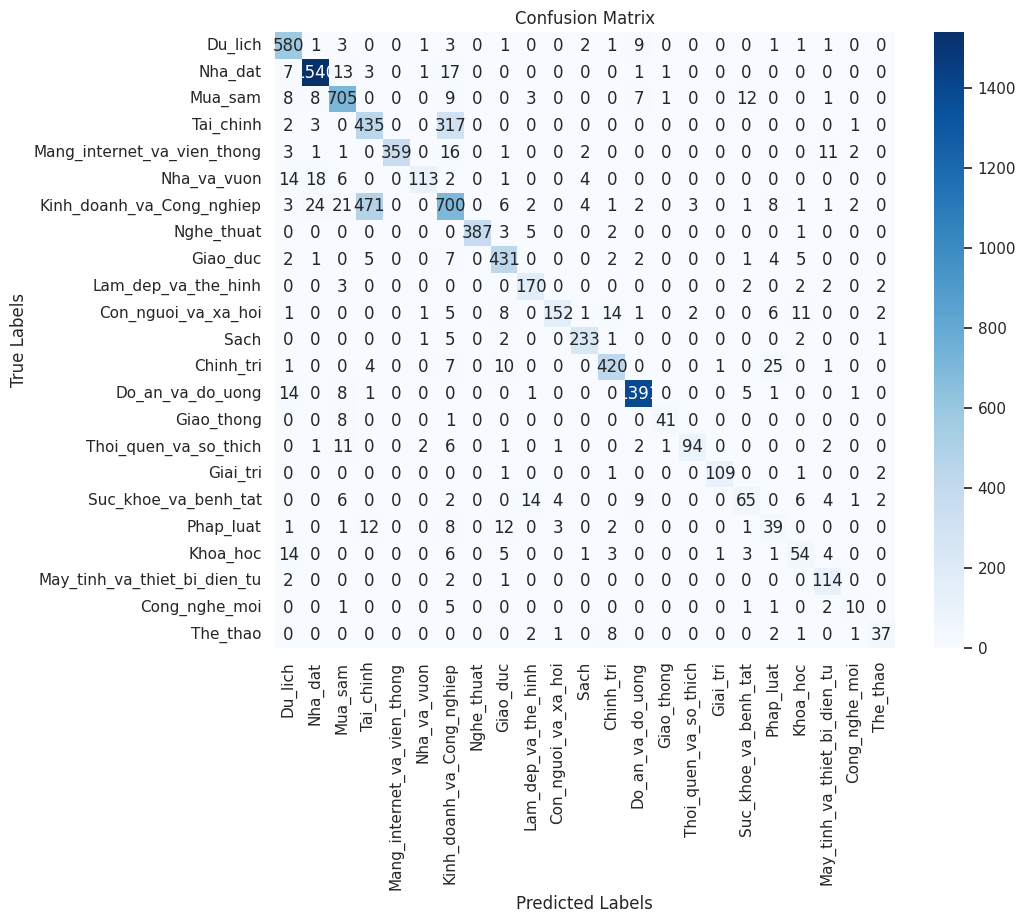

In [58]:
label_names = list(label_to_encoded.keys())
label2id = list(label_to_encoded.values())
test_loss, test_accuracy, test_precision, test_recall, test_f1, all_labels, all_predictions = evaluate(model, testloader, criterion)
print_classification_report(all_labels, all_predictions, label_names)
plot_confusion_matrix(all_labels, all_predictions, label_names, label2id)

#Test model

In [ ]:
def tokenize_text(embed_lookup, text):

    tokens = nltk.word_tokenize(text)

    # Map tokens to indices in `embed_lookup`
    text_indices = []
    for word in tokens:
        try:
            word_idx = embed_lookup.key_to_index[word]
        except KeyError:
            word_idx = 0
        text_indices.append(word_idx)

    return text_indices

In [ ]:
def predict(embed_lookup, model, test_text, sequence_length=270):

    model.eval()

    test_text_preprocessed = preprocess_text(test_text)

    test_ints = tokenize_text(embed_lookup, test_text)

    features = pad_features([test_ints], sequence_length)

    # convert to tensor to pass into model
    feature_tensor = torch.from_numpy(features).to(torch.long).cuda()

    # get the output from the model
    with torch.no_grad():
        output = model(feature_tensor)

    output_prob = F.softmax(output, dim=1)

    _, predicted_class = torch.max(output_prob, dim=1)

    print(f'Predicted class: {predicted_class.item()} (label: {list(label_to_encoded.keys())[predicted_class.item()]})')
    print(f'Predicted class probability: {output_prob[0][predicted_class.item()]:.6f}')

    return predicted_class.item(), output_prob

In [ ]:
# 300 words
financial_post300 = """Quản lý tài chính cá nhân là một kỹ năng quan trọng giúp mỗi cá nhân đạt được mục tiêu tài chính và đảm bảo sự ổn định trong cuộc sống. Trong thời đại kinh tế biến động, việc hiểu và áp dụng các nguyên tắc tài chính cơ bản không chỉ giúp bạn kiểm soát nguồn tiền mà còn tối ưu hóa cơ hội đầu tư, gia tăng tài sản.

Bước đầu tiên trong quản lý tài chính cá nhân là xây dựng ngân sách. Việc theo dõi thu nhập và chi tiêu giúp bạn nhận thức rõ hơn về thói quen tài chính của mình. Một quy tắc phổ biến được áp dụng là "50/30/20", trong đó 50% thu nhập dành cho nhu cầu thiết yếu, 30% cho các mong muốn cá nhân, và 20% để tiết kiệm hoặc đầu tư.

Tiết kiệm và đầu tư là hai yếu tố không thể thiếu trong chiến lược tài chính dài hạn. Trong khi tiết kiệm giúp bạn có một khoản dự phòng cho các tình huống khẩn cấp, đầu tư lại là cách để tiền của bạn sinh lời qua thời gian. Tuy nhiên, đầu tư đi kèm rủi ro, vì vậy việc hiểu rõ các công cụ tài chính như cổ phiếu, trái phiếu, hoặc quỹ đầu tư là vô cùng cần thiết.

Ngoài ra, quản lý nợ cũng đóng vai trò quan trọng. Việc giảm thiểu nợ xấu và sử dụng các khoản vay một cách hợp lý sẽ giúp bạn duy trì sức khỏe tài chính. Cuối cùng, bảo hiểm và lập kế hoạch tài chính dài hạn sẽ là lá chắn bảo vệ bạn trước những biến cố không lường trước trong cuộc sống.

Tóm lại, quản lý tài chính cá nhân không phải là một nhiệm vụ khó khăn nếu bạn có kế hoạch và kỷ luật. Hãy bắt đầu với những bước nhỏ, và bạn sẽ thấy sự khác biệt tích cực trong tài chính của mình theo thời gian."""
predict(embed_lookup, best_model, financial_post300, seq_length)

Predicted class: 3 (label: Tai_chinh)
Predicted class probability: 0.526299


(3,
 tensor([[6.0597e-07, 4.0199e-05, 1.7488e-05, 5.2630e-01, 5.9943e-06, 7.0812e-06,
          4.7339e-01, 2.8122e-07, 6.5137e-05, 2.1352e-08, 2.7772e-07, 3.3656e-06,
          2.0005e-05, 5.8237e-07, 7.8834e-09, 2.5392e-08, 4.2711e-08, 2.7309e-07,
          9.1715e-05, 2.8646e-07, 4.9363e-05, 6.7785e-06, 3.5478e-08]],
        device='cuda:0'))

In [ ]:
# 250 words
financial_post250 = """Trong bối cảnh nền kinh tế toàn cầu ngày càng biến động, đầu tư thông minh trở thành một trong những cách hiệu quả nhất để gia tăng tài sản. Đây không chỉ là việc dành ra một phần thu nhập để "để dành" mà còn là cách tối ưu hóa tiền bạc, giúp nó sinh lời một cách bền vững.

Đầu tư thành công bắt đầu từ việc xây dựng một chiến lược rõ ràng, phù hợp với mục tiêu tài chính và mức độ chấp nhận rủi ro của bạn. Các kênh đầu tư phổ biến bao gồm cổ phiếu, trái phiếu, bất động sản và quỹ đầu tư. Mỗi loại tài sản đều có ưu và nhược điểm riêng. Chẳng hạn, cổ phiếu có khả năng sinh lợi cao nhưng biến động lớn, trong khi trái phiếu mang lại sự ổn định nhưng lãi suất thấp hơn.

Một nguyên tắc quan trọng trong đầu tư là đa dạng hóa danh mục. Việc phân bổ tiền vào nhiều loại tài sản khác nhau giúp giảm thiểu rủi ro và tối ưu hóa lợi nhuận. Đồng thời, nhà đầu tư cần duy trì kỷ luật và kiên nhẫn, tránh bị ảnh hưởng bởi cảm xúc khi thị trường thay đổi.

Ngoài ra, việc trang bị kiến thức tài chính cũng rất quan trọng. Đọc sách, tham gia các khóa học đầu tư hoặc theo dõi thông tin thị trường là cách để bạn đưa ra quyết định chính xác.

Đầu tư không phải là một cuộc đua mà là hành trình dài hạn. Với chiến lược đúng đắn và sự chuẩn bị kỹ lưỡng, bạn có thể tạo dựng nền tảng tài chính vững chắc cho tương lai."""
predict(embed_lookup, best_model, financial_post250, seq_length)

Predicted class: 3 (label: Tai_chinh)
Predicted class probability: 0.545604


(3,
 tensor([[1.1113e-05, 9.8824e-04, 2.8423e-04, 5.4560e-01, 1.0468e-05, 2.6935e-04,
          4.5211e-01, 6.7885e-07, 2.5530e-04, 6.3095e-07, 2.4356e-06, 2.3782e-05,
          4.2852e-05, 4.2040e-05, 8.6453e-08, 9.6457e-07, 9.3977e-08, 1.3442e-05,
          2.4567e-04, 4.1732e-06, 8.2022e-05, 3.3632e-06, 7.8586e-08]],
        device='cuda:0'))

In [ ]:
# 350 words
financial_post350 = """Tự do tài chính là trạng thái khi một người không còn phải lo lắng về tiền bạc và có thể sống theo cách mình mong muốn. Đây là mục tiêu mà nhiều người khao khát, nhưng để đạt được điều này, cần sự kỷ luật, chiến lược và kiên nhẫn trong quản lý tài chính.

Bước đầu tiên để tiến tới tự do tài chính là hiểu rõ tình hình tài chính cá nhân. Điều này bao gồm việc theo dõi thu nhập, chi tiêu, và tài sản hiện có. Một kế hoạch ngân sách chặt chẽ sẽ giúp bạn kiểm soát dòng tiền, đồng thời xác định được khoản tiết kiệm cần thiết để đạt được các mục tiêu trong tương lai.

Tiết kiệm và đầu tư là yếu tố không thể thiếu trên con đường này. Tiết kiệm giúp bạn xây dựng quỹ khẩn cấp để ứng phó với những tình huống bất ngờ, như mất việc hoặc chi phí y tế. Trong khi đó, đầu tư mang lại cơ hội gia tăng tài sản một cách bền vững thông qua các kênh như cổ phiếu, bất động sản hoặc quỹ hưu trí.

Ngoài ra, quản lý nợ đóng vai trò quan trọng trong việc duy trì sức khỏe tài chính. Hạn chế nợ xấu và tối ưu hóa các khoản vay giúp bạn giảm bớt gánh nặng lãi suất, từ đó tăng khả năng tiết kiệm và đầu tư.

Tuy nhiên, tự do tài chính không chỉ nằm ở việc tích lũy tiền bạc mà còn ở cách bạn sử dụng nó. Việc cân bằng giữa tiết kiệm, chi tiêu và đầu tư vào những giá trị thực sự quan trọng như giáo dục, sức khỏe và trải nghiệm cá nhân sẽ giúp bạn sống một cuộc sống ý nghĩa hơn.

Tóm lại, tự do tài chính là hành trình dài hơi, đòi hỏi sự kiên trì và cam kết. Nhưng khi đạt được, nó mang lại cảm giác an tâm, tự chủ và khả năng theo đuổi những điều bạn yêu thích mà không bị ràng buộc bởi gánh nặng tài chính. Hãy bắt đầu ngay hôm nay bằng cách lập kế hoạch và thực hiện từng bước nhỏ để xây dựng tương lai tài chính vững mạnh."""
predict(embed_lookup, best_model, financial_post350, seq_length)

Predicted class: 6 (label: Kinh_doanh_va_Cong_nghiep)
Predicted class probability: 0.545713


(6,
 tensor([[7.5403e-05, 3.5755e-03, 1.7968e-03, 4.4508e-01, 8.8976e-05, 1.5892e-03,
          5.4571e-01, 7.3767e-06, 5.5639e-04, 6.3352e-06, 2.6020e-05, 1.2970e-04,
          2.1118e-04, 1.3066e-04, 3.4931e-06, 1.4399e-05, 2.0831e-06, 9.1920e-05,
          4.4061e-04, 4.0504e-05, 3.8575e-04, 3.6403e-05, 2.6086e-06]],
        device='cuda:0'))

In [ ]:
# 250 words
education_post250 = "Giáo dục là nền tảng quan trọng để xây dựng một xã hội phát triển và bền vững. Đó là công cụ giúp con người phát triển toàn diện về trí tuệ, kỹ năng và phẩm chất. Hệ thống giáo dục không chỉ truyền đạt kiến thức mà còn góp phần hình thành những giá trị đạo đức và kỹ năng sống cần thiết trong xã hội. Một nền giáo dục chất lượng giúp tạo ra những thế hệ trẻ có năng lực và phẩm chất tốt, từ đó đóng góp vào sự phát triển kinh tế, xã hội của quốc gia. Giáo dục hiện nay đang đứng trước nhiều thử thách lớn, đặc biệt là trong bối cảnh cuộc cách mạng công nghiệp 4.0, khi công nghệ và trí tuệ nhân tạo đang thay đổi nhanh chóng. Để thích nghi với sự thay đổi này, giáo dục cần phải phát triển linh hoạt, giúp học sinh, sinh viên không chỉ có kiến thức chuyên môn mà còn có khả năng sáng tạo, tư duy phản biện và kỹ năng làm việc nhóm. Các phương pháp giảng dạy hiện đại như học tập dựa trên dự án, học tập chủ động, và sử dụng công nghệ trong giảng dạy đang ngày càng phổ biến. Bên cạnh đó, giáo dục còn là yếu tố quan trọng trong việc giảm thiểu bất bình đẳng xã hội. Một nền giáo dục công bằng và toàn diện giúp mỗi cá nhân, dù xuất phát điểm như thế nào, đều có cơ hội phát triển và vươn lên trong cuộc sống. Chính vì vậy, việc đầu tư vào giáo dục luôn được coi là ưu tiên hàng đầu của nhiều quốc gia trên thế giới."
predict(embed_lookup, best_model, education_post250, seq_length)

Predicted class: 8 (label: Giao_duc)
Predicted class probability: 0.999994


(8,
 tensor([[2.5847e-11, 1.0716e-17, 3.7138e-15, 1.0298e-08, 2.5122e-17, 7.7237e-12,
          3.8681e-08, 2.0170e-07, 9.9999e-01, 4.9373e-10, 9.4564e-08, 4.2720e-07,
          2.1129e-06, 1.7004e-10, 1.5666e-22, 8.2863e-12, 1.8965e-09, 2.0863e-10,
          1.0615e-08, 2.7427e-06, 6.0587e-14, 7.4693e-14, 2.8765e-12]],
        device='cuda:0'))

In [ ]:
# 300 words
food_post_300 = "Đồ ăn và đồ uống là những yếu tố không thể thiếu trong đời sống hàng ngày của mỗi con người. Chúng không chỉ đơn thuần cung cấp năng lượng mà còn mang lại sự thoải mái, thú vị cho người thưởng thức. Văn hóa ẩm thực của mỗi quốc gia là sự kết hợp độc đáo giữa các nguyên liệu và phương pháp chế biến, tạo nên những món ăn đặc trưng riêng biệt. Trong đó, đồ ăn không chỉ là sự kết hợp giữa các thực phẩm mà còn là một phần quan trọng trong việc duy trì sức khỏe, làm đẹp và thể hiện sự sáng tạo của người nấu. Ở mỗi quốc gia, đồ ăn và đồ uống đều có những đặc trưng riêng biệt. Ví dụ, trong ẩm thực Việt Nam, phở, bánh mì hay các món ăn từ gạo, rau củ đều là những món ăn phổ biến và được yêu thích. Còn ở các quốc gia phương Tây, các món ăn như pizza, pasta hay những món ăn từ thịt nướng luôn được ưa chuộng. Đồ uống cũng rất đa dạng, từ nước trái cây tươi, nước giải khát đến các loại thức uống có cồn như bia, rượu vang. Những món đồ uống này không chỉ giúp giải khát mà còn tạo ra những trải nghiệm đặc biệt trong các dịp lễ hội hay cuộc gặp gỡ bạn bè. Tuy nhiên, việc lựa chọn đồ ăn và đồ uống sao cho lành mạnh là rất quan trọng. Việc ăn uống khoa học và hợp lý giúp duy trì sức khỏe tốt, ngăn ngừa các bệnh tật. Ngoài ra, hiện nay, xu hướng ăn uống lành mạnh cũng đang ngày càng được quan tâm với các món ăn từ thực vật, đồ uống detox hay chế độ ăn giảm cân, giúp mọi người có một lối sống khỏe mạnh hơn."
predict(embed_lookup, best_model, food_post_300, seq_length)

Predicted class: 13 (label: Do_an_va_do_uong)
Predicted class probability: 0.997475


(13,
 tensor([[1.3362e-03, 3.0095e-07, 8.2549e-04, 2.3530e-07, 8.7773e-12, 2.2697e-06,
          2.7279e-05, 2.1372e-11, 8.9725e-07, 1.4830e-07, 2.0490e-06, 9.3365e-06,
          2.1175e-11, 9.9747e-01, 8.2872e-13, 1.0489e-05, 4.8028e-15, 3.0876e-04,
          1.2001e-08, 1.5999e-06, 8.0787e-13, 6.0135e-16, 5.1489e-12]],
        device='cuda:0'))

In [ ]:
entertainment_post350 = """Thị trường bất động sản luôn được coi là một trong những kênh đầu tư hấp dẫn và bền vững, nhờ vào giá trị tài sản tăng trưởng theo thời gian. Tuy nhiên, với sự biến động kinh tế và các yếu tố như lạm phát, chính sách tín dụng, và xu hướng đô thị hóa, việc đầu tư vào nhà đất đòi hỏi sự am hiểu và chiến lược phù hợp.

Hiện nay, các thành phố lớn và khu vực ven đô đang trở thành điểm nóng trên thị trường bất động sản. Sự phát triển hạ tầng giao thông, như đường cao tốc, tàu điện ngầm, và các khu công nghiệp, tạo động lực lớn cho giá trị bất động sản gia tăng. Những khu vực có tiềm năng phát triển cao thường thu hút nhiều nhà đầu tư nhờ khả năng sinh lời vượt trội trong trung và dài hạn.

Một xu hướng đáng chú ý khác là bất động sản xanh và bền vững. Người mua nhà ngày càng ưu tiên các dự án tích hợp không gian sống thân thiện với môi trường, có cảnh quan xanh và các tiện ích hiện đại. Điều này tạo ra cơ hội cho các nhà đầu tư và chủ đầu tư nhắm đến các dự án bất động sản cao cấp với thiết kế thông minh, tiết kiệm năng lượng.

Đối với nhà đầu tư cá nhân, việc xác định mục tiêu rõ ràng là rất quan trọng. Nếu bạn mua bất động sản để ở, cần cân nhắc các yếu tố như vị trí, chất lượng xây dựng, và tiện ích xung quanh. Ngược lại, nếu đầu tư để cho thuê hoặc mua bán, việc phân tích tiềm năng sinh lời, dòng tiền và giá trị tài sản tương lai sẽ là yếu tố quyết định thành công.

Tuy nhiên, đầu tư bất động sản không phải là không có rủi ro. Các yếu tố như biến động giá cả, sự thay đổi trong chính sách pháp lý, và biến động kinh tế toàn cầu đều có thể ảnh hưởng đến lợi nhuận. Vì vậy, nhà đầu tư cần có kế hoạch tài chính vững chắc, nghiên cứu kỹ lưỡng và luôn chuẩn bị sẵn sàng đối mặt với rủi ro.

Tóm lại, bất động sản là một lĩnh vực đầu tư đầy cơ hội nhưng cũng không kém phần thách thức. Với chiến lược hợp lý và sự chuẩn bị kỹ càng, đây có thể là kênh tạo dựng tài sản dài hạn hiệu quả và an toàn."""
predict(embed_lookup, best_model, entertainment_post350, seq_length)

Predicted class: 1 (label: Nha_dat)
Predicted class probability: 0.838587


(1,
 tensor([[1.6252e-05, 8.3859e-01, 7.3611e-03, 1.5180e-02, 1.1218e-05, 1.1302e-04,
          1.3871e-01, 6.6639e-12, 3.1038e-09, 8.7799e-12, 1.3754e-11, 1.0312e-10,
          1.5818e-10, 4.4891e-07, 5.3471e-06, 5.5391e-10, 1.4483e-15, 3.0814e-10,
          1.1420e-05, 3.3821e-11, 3.1998e-09, 9.7002e-11, 4.0968e-13]],
        device='cuda:0'))